In [1]:
import matplotlib
import pandas as pd
import seaborn as sns
import math
import statistics
import numpy as np
sns.set(color_codes=True)
final = pd.read_csv('Gross domestic product by expenditures at current prices - final consumption expenditure.csv')
final.info()
final

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country or Area   1301 non-null   object 
 1   SNA93 Table Code  1301 non-null   object 
 2   Sub Group         1293 non-null   object 
 3   Item              1293 non-null   object 
 4   SNA93 Item Code   1293 non-null   object 
 5   Year              1293 non-null   float64
 6   Series            1293 non-null   float64
 7   Currency          1293 non-null   object 
 8   SNA System        1293 non-null   float64
 9   Fiscal Year Type  1293 non-null   object 
 10  Value             1293 non-null   float64
 11  Value Footnotes   37 non-null     float64
dtypes: float64(5), object(7)
memory usage: 122.1+ KB


,Country or Area,SNA93 Table Code,Sub Group,Item,SNA93 Item Code,Year,Series,Currency,SNA System,Fiscal Year Type,Value,Value Footnotes
0,Algeria,1.1,Expenditures of the gross domestic product,Final consumption expenditure,P.3,2019.0,100.0,Algerian dinar,1993.0,Western calendar year,1.234817e+13,NaN
1,Algeria,1.1,Expenditures of the gross domestic product,General government final consumption expenditure,P.3,2019.0,100.0,Algerian dinar,1993.0,Western calendar year,3.461787e+12,NaN
2,Algeria,1.1,Expenditures of the gross domestic product,Final consumption expenditure,P.3,2018.0,100.0,Algerian dinar,1993.0,Western calendar year,1.207633e+13,NaN
3,Algeria,1.1,Expenditures of the gross domestic product,General government final consumption expenditure,P.3,2018.0,100.0,Algerian dinar,1993.0,Western calendar year,3.508076e+12,NaN
4,Algeria,1.1,Expenditures of the gross domestic product,Final consumption expenditure,P.3,2017.0,100.0,Algerian dinar,1993.0,Western calendar year,1.161133e+13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1296,3,Discrepancy with equivalent item in Table 1.3 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1297,4,Includes changes in inventories.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1298,5,Data for this year(s) have not been revised an...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1299,6,Data for this year refers to preliminary data.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#BAR Chart of African Countires from 2010 - 2019

No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Country or Area', ylabel='Value'>

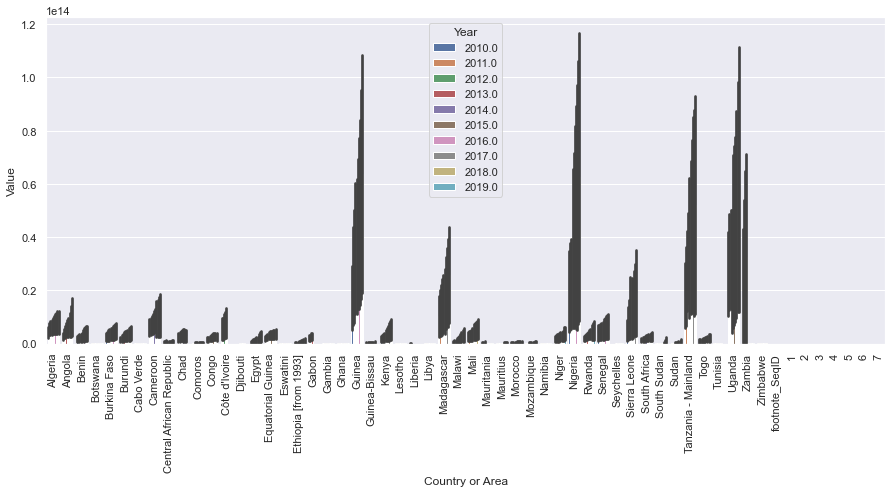

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
finall = pd.read_csv('Gross domestic product by expenditures at current prices - final consumption expenditure.csv')
 
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 1 # inch margin
s = maxsize/plt.gcf().dpi*40+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[0])
plt.xticks(rotation=90)


 
    

plt.legend(loc='upper right')
sns.barplot(finall['Country or Area'],finall['Value'],  finall['Year'])

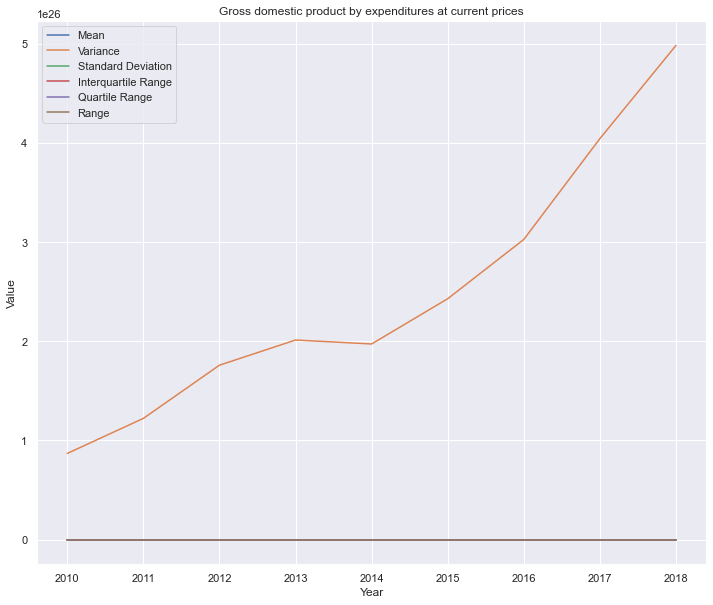

In [11]:
plt.figure(figsize=(12,10))

def interquartile_range(sample):
    q3, q1 = np.percentile(sample, [75 ,25])
    return q3 - q1

def quartile_range(sample):
    q3, q1 = np.percentile(sample, [75 ,25])
    return (q3 - q1)/2

def _range(sample):
    return sample.max() - sample.min()

def create_plot(fn, label):
    ls = []
    for year in range(2010,2019):
            ls.append(fn(finall[finall['Year'] == year]['Value']))
              
    plt.plot(range(2010,2019), ls, label=label)
    plt.title('Gross domestic product by expenditures at current prices')
    plt.ylabel('Value')
    plt.xlabel('Year')
    
create_plot(statistics.mean, 'Mean')
create_plot(statistics.variance, 'Variance')
create_plot(statistics.stdev, 'Standard Deviation')
create_plot(interquartile_range, 'Interquartile Range')
create_plot(quartile_range, 'Quartile Range')
create_plot(_range, 'Range')

plt.legend(loc='best')